In [47]:
# @title Import Necessary Packages
import numpy as np
import pandas as pd

In [48]:
# @title Mount Google Drive
from google.colab import drive # Load data from google drive
drive.mount("/content/drive")

%cd "/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C"
%ls -f

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C
data_2_preprocess.ipynb  test_1.csv
data/                    result_1.csv
model_train_LSTM.ipynb   result_2.csv
Dataset_train_1.gsheet   Prediction_result.csv
result_1.gsheet          Prediction_result.gsheet
Dataset_1.gsheet         model_train_TREE_official.ipynb
Dataset_2.gsheet         data_financials.csv
Dataset_2.csv            data_econ.csv
Dataset_test_1.csv       Dataset_1.csv
Dataset_test_2.csv       Dataset_test_combined.csv
Dataset_train_2.csv      Dataset_train_1.csv
train_2.csv              train_1.csv
test_2.csv               data_1_preprocess.ipynb


In [49]:
data_1 = pd.read_csv("Dataset_1.csv")
credit_spread = pd.read_csv("data/7_credit_spread.csv")
econ_metrics = pd.read_csv("data/8_marco_econ_metrics_month.csv")
stock_price = pd.read_csv("data/9_stock_price_month.csv")

In [50]:
data_1 = data_1.drop(data_1.columns[22:48], axis = 1) # drop financials
data_1 = data_1.rename(columns = {'Y': 'Bond Rating Rank Next Month'})

In [51]:
data_1.info()
data_1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23000 entries, 0 to 22999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RIC                          23000 non-null  object 
 1   BondID                       23000 non-null  int64  
 2   PermID                       23000 non-null  int64  
 3   ISIN                         23000 non-null  object 
 4   IssuePrice                   23000 non-null  float64
 5   IssueDate                    23000 non-null  object 
 6   AssetStatusDescription       23000 non-null  object 
 7   CouponFrequency              23000 non-null  float64
 8   CouponRate                   23000 non-null  float64
 9   DenominationMinimum          23000 non-null  float64
 10  FaceIssuedTotal              23000 non-null  float64
 11  FaceIssuedUSD                23000 non-null  int64  
 12  FaceOutstanding              23000 non-null  float64
 13  FaceOutstandingD

,RIC,BondID,PermID,ISIN,IssuePrice,IssueDate,AssetStatusDescription,CouponFrequency,CouponRate,DenominationMinimum,...,RealGDP,PPI,Unemployment,InterestRate,CoreCPI,Issuer Rating Rank,Bond Rating Rank,Year,Month,Bond Rating Rank Next Month
0,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,7.2,3.15,5.3,0.0,0.2,8.333333,10.0,2018.0,11.0,10.0
1,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,3.5,-2.26,5.3,0.0,0.5,8.333333,10.0,2018.0,12.0,10.0
2,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,3.5,0.10,5.7,0.0,0.9,8.333333,10.0,2019.0,1.0,10.0
3,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,3.5,0.10,5.6,0.0,0.7,8.333333,10.0,2019.0,2.0,10.0
4,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,4.3,0.42,5.4,0.0,1.0,8.333333,10.0,2019.0,3.0,9.0


In [52]:
for name, group in data_1.groupby(by = ["Year", "Month"]):
    print(name, group.shape)

(2011.0, 9.0) (5, 35)
(2011.0, 10.0) (5, 35)
(2011.0, 11.0) (5, 35)
(2011.0, 12.0) (5, 35)
(2012.0, 1.0) (6, 35)
(2012.0, 2.0) (6, 35)
(2012.0, 3.0) (6, 35)
(2012.0, 4.0) (6, 35)
(2012.0, 5.0) (10, 35)
(2012.0, 6.0) (15, 35)
(2012.0, 7.0) (16, 35)
(2012.0, 8.0) (16, 35)
(2012.0, 9.0) (16, 35)
(2012.0, 10.0) (16, 35)
(2012.0, 11.0) (16, 35)
(2012.0, 12.0) (17, 35)
(2013.0, 1.0) (18, 35)
(2013.0, 2.0) (19, 35)
(2013.0, 3.0) (19, 35)
(2013.0, 4.0) (20, 35)
(2013.0, 5.0) (20, 35)
(2013.0, 6.0) (20, 35)
(2013.0, 7.0) (23, 35)
(2013.0, 8.0) (23, 35)
(2013.0, 9.0) (23, 35)
(2013.0, 10.0) (26, 35)
(2013.0, 11.0) (29, 35)
(2013.0, 12.0) (29, 35)
(2014.0, 1.0) (30, 35)
(2014.0, 2.0) (34, 35)
(2014.0, 3.0) (35, 35)
(2014.0, 4.0) (36, 35)
(2014.0, 5.0) (37, 35)
(2014.0, 6.0) (39, 35)
(2014.0, 7.0) (39, 35)
(2014.0, 8.0) (39, 35)
(2014.0, 9.0) (42, 35)
(2014.0, 10.0) (45, 35)
(2014.0, 11.0) (45, 35)
(2014.0, 12.0) (46, 35)
(2015.0, 1.0) (47, 35)
(2015.0, 2.0) (48, 35)
(2015.0, 3.0) (52, 35)
(2015.0

In [53]:
# @title Merge with Stock Price

stock_price = stock_price.rename(columns = {"year": "Year", "month": "Month", "EWMA": "Stock Price"})

data_sp = data_1.merge(stock_price, on = ["PermID", "Year", "Month"])
data_sp = data_sp.sort_values(by = ['RIC', 'Year', "Month"]).reset_index(drop = True)

data_2 = data_sp

In [54]:
# data_sp.info()
for name, group in data_sp.groupby(by = ["Year", "Month"]):
    print(name, group.shape)

(2011.0, 9.0) (5, 36)
(2011.0, 10.0) (5, 36)
(2011.0, 11.0) (5, 36)
(2011.0, 12.0) (5, 36)
(2012.0, 1.0) (6, 36)
(2012.0, 2.0) (6, 36)
(2012.0, 3.0) (6, 36)
(2012.0, 4.0) (6, 36)
(2012.0, 5.0) (10, 36)
(2012.0, 6.0) (11, 36)
(2012.0, 7.0) (11, 36)
(2012.0, 8.0) (11, 36)
(2012.0, 9.0) (11, 36)
(2012.0, 10.0) (11, 36)
(2012.0, 11.0) (11, 36)
(2012.0, 12.0) (12, 36)
(2013.0, 1.0) (13, 36)
(2013.0, 2.0) (14, 36)
(2013.0, 3.0) (14, 36)
(2013.0, 4.0) (14, 36)
(2013.0, 5.0) (14, 36)
(2013.0, 6.0) (14, 36)
(2013.0, 7.0) (16, 36)
(2013.0, 8.0) (16, 36)
(2013.0, 9.0) (16, 36)
(2013.0, 10.0) (19, 36)
(2013.0, 11.0) (22, 36)
(2013.0, 12.0) (22, 36)
(2014.0, 1.0) (23, 36)
(2014.0, 2.0) (24, 36)
(2014.0, 3.0) (25, 36)
(2014.0, 4.0) (25, 36)
(2014.0, 5.0) (25, 36)
(2014.0, 6.0) (26, 36)
(2014.0, 7.0) (26, 36)
(2014.0, 8.0) (26, 36)
(2014.0, 9.0) (26, 36)
(2014.0, 10.0) (27, 36)
(2014.0, 11.0) (27, 36)
(2014.0, 12.0) (28, 36)
(2015.0, 1.0) (29, 36)
(2015.0, 2.0) (29, 36)
(2015.0, 3.0) (31, 36)
(2015.0

In [55]:
# @title Merge with Credit Spread

data_2 = data_2.merge(credit_spread, on = ['RIC', 'Year', 'Month'])
data_2 = data_2.reset_index(drop = True)

In [56]:
for name, group in data_2.groupby(by = ["Year", "Month"]):
    print(name, group.shape)

(2011.0, 9.0) (4, 37)
(2011.0, 10.0) (4, 37)
(2011.0, 11.0) (4, 37)
(2011.0, 12.0) (4, 37)
(2012.0, 1.0) (4, 37)
(2012.0, 2.0) (5, 37)
(2012.0, 3.0) (5, 37)
(2012.0, 4.0) (5, 37)
(2012.0, 5.0) (9, 37)
(2012.0, 6.0) (9, 37)
(2012.0, 7.0) (9, 37)
(2012.0, 8.0) (10, 37)
(2012.0, 9.0) (10, 37)
(2012.0, 10.0) (10, 37)
(2012.0, 11.0) (10, 37)
(2012.0, 12.0) (10, 37)
(2013.0, 1.0) (10, 37)
(2013.0, 2.0) (10, 37)
(2013.0, 3.0) (10, 37)
(2013.0, 4.0) (10, 37)
(2013.0, 5.0) (10, 37)
(2013.0, 6.0) (10, 37)
(2013.0, 7.0) (10, 37)
(2013.0, 8.0) (10, 37)
(2013.0, 9.0) (10, 37)
(2013.0, 10.0) (10, 37)
(2013.0, 11.0) (10, 37)
(2013.0, 12.0) (10, 37)
(2014.0, 1.0) (13, 37)
(2014.0, 2.0) (17, 37)
(2014.0, 3.0) (17, 37)
(2014.0, 4.0) (19, 37)
(2014.0, 5.0) (20, 37)
(2014.0, 6.0) (20, 37)
(2014.0, 7.0) (20, 37)
(2014.0, 8.0) (20, 37)
(2014.0, 9.0) (21, 37)
(2014.0, 10.0) (21, 37)
(2014.0, 11.0) (21, 37)
(2014.0, 12.0) (22, 37)
(2015.0, 1.0) (23, 37)
(2015.0, 2.0) (23, 37)
(2015.0, 3.0) (25, 37)
(2015.0, 4

In [57]:
data_2.info()
data_2.head(24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16377 entries, 0 to 16376
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RIC                          16377 non-null  object 
 1   BondID                       16377 non-null  int64  
 2   PermID                       16377 non-null  int64  
 3   ISIN                         16377 non-null  object 
 4   IssuePrice                   16377 non-null  float64
 5   IssueDate                    16377 non-null  object 
 6   AssetStatusDescription       16377 non-null  object 
 7   CouponFrequency              16377 non-null  float64
 8   CouponRate                   16377 non-null  float64
 9   DenominationMinimum          16377 non-null  float64
 10  FaceIssuedTotal              16377 non-null  float64
 11  FaceIssuedUSD                16377 non-null  int64  
 12  FaceOutstanding              16377 non-null  float64
 13  FaceOutstandingD

,RIC,BondID,PermID,ISIN,IssuePrice,IssueDate,AssetStatusDescription,CouponFrequency,CouponRate,DenominationMinimum,...,Unemployment,InterestRate,CoreCPI,Issuer Rating Rank,Bond Rating Rank,Year,Month,Bond Rating Rank Next Month,Stock Price,Credit_spread
0,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.3,0.0,0.2,8.333333,10.0,2018.0,11.0,10.0,4.231748,0.018300
1,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.3,0.0,0.5,8.333333,10.0,2018.0,12.0,10.0,3.937874,0.022030
2,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.7,0.0,0.9,8.333333,10.0,2019.0,1.0,10.0,3.895664,0.024545
3,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.6,0.0,0.7,8.333333,10.0,2019.0,2.0,10.0,3.895582,0.022540
4,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.4,0.0,1.0,8.333333,10.0,2019.0,3.0,9.0,3.949505,0.019650
5,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,4.6,0.0,1.4,8.333333,9.0,2019.0,4.0,9.0,4.052703,0.018360
6,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,4.5,0.0,0.5,8.333333,9.0,2019.0,5.0,9.0,4.004442,0.015910
7,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,4.5,0.0,1.0,8.333333,9.0,2019.0,6.0,9.0,3.806421,0.018790
8,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.3,0.0,0.5,8.333333,9.0,2019.0,7.0,9.0,3.682993,0.016780
9,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.3,0.0,0.7,8.333333,9.0,2019.0,8.0,9.0,3.099678,0.015985


In [58]:
x = data_2.rename(columns = {"Credit_spread": "Credit Spread"}).sort_values(by = ["RIC","Year","Month"]).reset_index(drop = True)
y = pd.concat([data_2['RIC'], data_2.loc[:, 'Year':'Month'], data_2["Credit_spread"].rename("Credit Spread")], axis = 1).sort_values(by = ["RIC","Year","Month"]).reset_index(drop = True)

In [59]:
# @title Generate Y-value
x_grouped = x.iloc[:, :].groupby('RIC')
y_grouped = y.iloc[:, :].groupby('RIC')

new_x = pd.DataFrame()
for name, x_group in x_grouped: # drop the last one as we do not know its prediciton
  # print(x_group.shape[0], end = " ")
  x_group = x_group.iloc[:-1, :]
  # print(x_group.shape[0], end = " ")
  new_x = pd.concat([new_x, x_group], axis = 0)
  # print(name)
  # print(x_group["Prev Credit Spread"])
  # print()

print()
new_y = pd.DataFrame()
for name, y_group in y_grouped: # drop the first one as there is nothing to predict
  # print(y_group.shape[0], end = " ")
  y_group = y_group.iloc[1:, :]
  # print(y_group.shape[0], end = " ")
  new_y = pd.concat([new_y, y_group], axis = 0)
  # print(name)
  # print(y_group["Credit Spread"])
  # print()

print("Number of Data of x: ", new_x.shape[0])
print("Number of Data of y: ", new_y.shape[0])

new_x = new_x.reset_index(drop = True)
new_y = new_y.reset_index(drop = True)


Number of Data of x:  15996
Number of Data of y:  15996


In [60]:
for name, group in new_x.groupby(by = ["Year", "Month"]):
    print(name, group.shape, group['RIC'].unique().shape)

(2011.0, 9.0) (4, 37) (4,)
(2011.0, 10.0) (4, 37) (4,)
(2011.0, 11.0) (4, 37) (4,)
(2011.0, 12.0) (4, 37) (4,)
(2012.0, 1.0) (4, 37) (4,)
(2012.0, 2.0) (5, 37) (5,)
(2012.0, 3.0) (5, 37) (5,)
(2012.0, 4.0) (5, 37) (5,)
(2012.0, 5.0) (9, 37) (9,)
(2012.0, 6.0) (9, 37) (9,)
(2012.0, 7.0) (9, 37) (9,)
(2012.0, 8.0) (10, 37) (10,)
(2012.0, 9.0) (10, 37) (10,)
(2012.0, 10.0) (10, 37) (10,)
(2012.0, 11.0) (10, 37) (10,)
(2012.0, 12.0) (10, 37) (10,)
(2013.0, 1.0) (10, 37) (10,)
(2013.0, 2.0) (10, 37) (10,)
(2013.0, 3.0) (10, 37) (10,)
(2013.0, 4.0) (10, 37) (10,)
(2013.0, 5.0) (10, 37) (10,)
(2013.0, 6.0) (10, 37) (10,)
(2013.0, 7.0) (10, 37) (10,)
(2013.0, 8.0) (10, 37) (10,)
(2013.0, 9.0) (10, 37) (10,)
(2013.0, 10.0) (10, 37) (10,)
(2013.0, 11.0) (10, 37) (10,)
(2013.0, 12.0) (10, 37) (10,)
(2014.0, 1.0) (13, 37) (13,)
(2014.0, 2.0) (17, 37) (17,)
(2014.0, 3.0) (17, 37) (17,)
(2014.0, 4.0) (19, 37) (19,)
(2014.0, 5.0) (20, 37) (20,)
(2014.0, 6.0) (20, 37) (20,)
(2014.0, 7.0) (20, 37) (20,

In [61]:
new_x.info()
new_x.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15996 entries, 0 to 15995
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RIC                          15996 non-null  object 
 1   BondID                       15996 non-null  int64  
 2   PermID                       15996 non-null  int64  
 3   ISIN                         15996 non-null  object 
 4   IssuePrice                   15996 non-null  float64
 5   IssueDate                    15996 non-null  object 
 6   AssetStatusDescription       15996 non-null  object 
 7   CouponFrequency              15996 non-null  float64
 8   CouponRate                   15996 non-null  float64
 9   DenominationMinimum          15996 non-null  float64
 10  FaceIssuedTotal              15996 non-null  float64
 11  FaceIssuedUSD                15996 non-null  int64  
 12  FaceOutstanding              15996 non-null  float64
 13  FaceOutstandingD

,RIC,BondID,PermID,ISIN,IssuePrice,IssueDate,AssetStatusDescription,CouponFrequency,CouponRate,DenominationMinimum,...,Unemployment,InterestRate,CoreCPI,Issuer Rating Rank,Bond Rating Rank,Year,Month,Bond Rating Rank Next Month,Stock Price,Credit Spread
0,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.3,0.0,0.2,8.333333,10.0,2018.0,11.0,10.0,4.231748,0.018300
1,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.3,0.0,0.5,8.333333,10.0,2018.0,12.0,10.0,3.937874,0.022030
2,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.7,0.0,0.9,8.333333,10.0,2019.0,1.0,10.0,3.895664,0.024545
3,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.6,0.0,0.7,8.333333,10.0,2019.0,2.0,10.0,3.895582,0.022540
4,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.4,0.0,1.0,8.333333,10.0,2019.0,3.0,9.0,3.949505,0.019650
5,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,4.6,0.0,1.4,8.333333,9.0,2019.0,4.0,9.0,4.052703,0.018360
6,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,4.5,0.0,0.5,8.333333,9.0,2019.0,5.0,9.0,4.004442,0.015910
7,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,4.5,0.0,1.0,8.333333,9.0,2019.0,6.0,9.0,3.806421,0.018790
8,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.3,0.0,0.5,8.333333,9.0,2019.0,7.0,9.0,3.682993,0.016780
9,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,5.3,0.0,0.7,8.333333,9.0,2019.0,8.0,9.0,3.099678,0.015985


In [62]:
new_y.info()
new_y.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15996 entries, 0 to 15995
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RIC            15996 non-null  object 
 1   Year           15996 non-null  float64
 2   Month          15996 non-null  float64
 3   Credit Spread  15996 non-null  float64
dtypes: float64(3), object(1)
memory usage: 500.0+ KB


,RIC,Year,Month,Credit Spread
0,00135TAA2=,2018.0,12.0,0.022030
1,00135TAA2=,2019.0,1.0,0.024545
2,00135TAA2=,2019.0,2.0,0.022540
3,00135TAA2=,2019.0,3.0,0.019650
4,00135TAA2=,2019.0,4.0,0.018360
5,00135TAA2=,2019.0,5.0,0.015910
6,00135TAA2=,2019.0,6.0,0.018790
7,00135TAA2=,2019.0,7.0,0.016780
8,00135TAA2=,2019.0,8.0,0.015985
9,00135TAA2=,2019.0,9.0,0.018540


In [63]:
y = new_y["Credit Spread"].rename("Y")
data = pd.concat([new_x, y], axis = 1)

In [64]:
# @title Add Credit Migration

credit_migration = data['Bond Rating Rank Next Month'] - data["Bond Rating Rank"]
data.insert(data.shape[1] - 1, "Credit Migration", credit_migration)
data.drop('Bond Rating Rank Next Month', axis = 1, inplace = True)

In [65]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15996 entries, 0 to 15995
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RIC                       15996 non-null  object 
 1   BondID                    15996 non-null  int64  
 2   PermID                    15996 non-null  int64  
 3   ISIN                      15996 non-null  object 
 4   IssuePrice                15996 non-null  float64
 5   IssueDate                 15996 non-null  object 
 6   AssetStatusDescription    15996 non-null  object 
 7   CouponFrequency           15996 non-null  float64
 8   CouponRate                15996 non-null  float64
 9   DenominationMinimum       15996 non-null  float64
 10  FaceIssuedTotal           15996 non-null  float64
 11  FaceIssuedUSD             15996 non-null  int64  
 12  FaceOutstanding           15996 non-null  float64
 13  FaceOutstandingDate       15996 non-null  object 
 14  FaceOu

,RIC,BondID,PermID,ISIN,IssuePrice,IssueDate,AssetStatusDescription,CouponFrequency,CouponRate,DenominationMinimum,...,InterestRate,CoreCPI,Issuer Rating Rank,Bond Rating Rank,Year,Month,Stock Price,Credit Spread,Credit Migration,Y
0,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,0.2,8.333333,10.0,2018.0,11.0,4.231748,0.018300,0.0,0.022030
1,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,0.5,8.333333,10.0,2018.0,12.0,3.937874,0.022030,0.0,0.024545
2,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,0.9,8.333333,10.0,2019.0,1.0,3.895664,0.024545,0.0,0.022540
3,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,0.7,8.333333,10.0,2019.0,2.0,3.895582,0.022540,0.0,0.019650
4,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,1.0,8.333333,10.0,2019.0,3.0,3.949505,0.019650,-1.0,0.018360
5,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,1.4,8.333333,9.0,2019.0,4.0,4.052703,0.018360,0.0,0.015910
6,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,0.5,8.333333,9.0,2019.0,5.0,4.004442,0.015910,0.0,0.018790
7,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,1.0,8.333333,9.0,2019.0,6.0,3.806421,0.018790,0.0,0.016780
8,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,0.5,8.333333,9.0,2019.0,7.0,3.682993,0.016780,0.0,0.015985
9,00135TAA2=,192814000000,5059082241,US00135TAA25,99.771,12/10/2018,Issued,2.0,4.75,200000.0,...,0.0,0.7,8.333333,9.0,2019.0,8.0,3.099678,0.015985,0.0,0.018540


In [66]:
# @title Output Unpreprocessed Dataset
combined_csv = data.to_csv(index=False)

with open('/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C/Dataset_2.csv', 'w') as f:
  f.write(combined_csv)

In [67]:
# @title Drop columns of Identifier
data = data.drop(['BondID', 'PermID', 'ISIN'], axis = 1)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15996 entries, 0 to 15995
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RIC                       15996 non-null  object 
 1   IssuePrice                15996 non-null  float64
 2   IssueDate                 15996 non-null  object 
 3   AssetStatusDescription    15996 non-null  object 
 4   CouponFrequency           15996 non-null  float64
 5   CouponRate                15996 non-null  float64
 6   DenominationMinimum       15996 non-null  float64
 7   FaceIssuedTotal           15996 non-null  float64
 8   FaceIssuedUSD             15996 non-null  int64  
 9   FaceOutstanding           15996 non-null  float64
 10  FaceOutstandingDate       15996 non-null  object 
 11  FaceOutstandingUSD        15996 non-null  int64  
 12  MoodysRatingDate          15996 non-null  object 
 13  Maturity                  15996 non-null  object 
 14  Common

<ipython-input-69-d8165e20c2ec>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


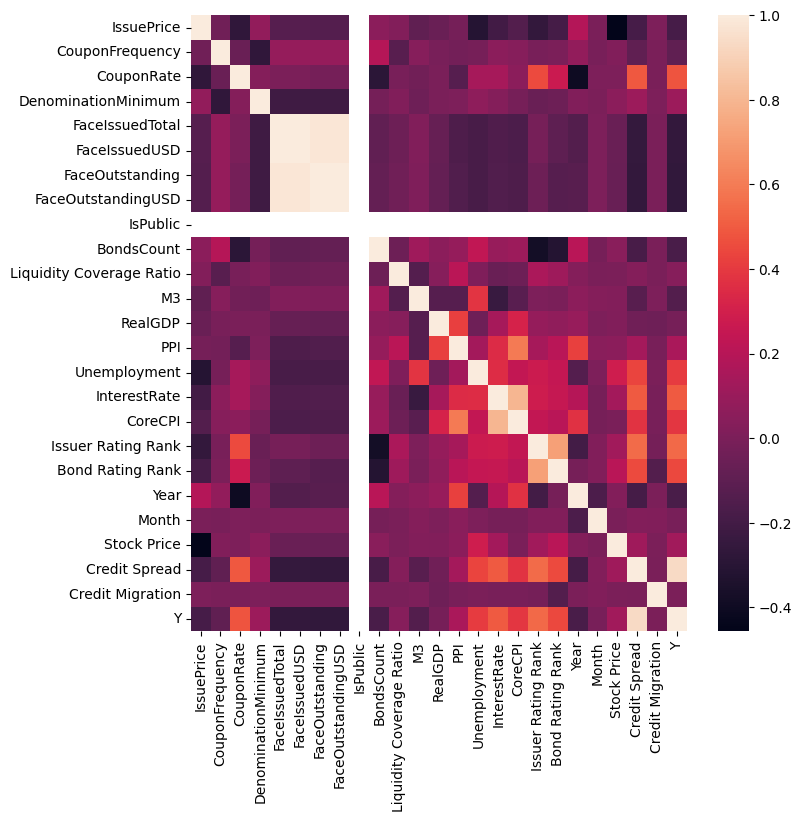

In [69]:
# @title Generate Correlation Heatmap
import plotly.graph_objects as go
import seaborn as sn
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots

# Analyze data with Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(8, 8))
sn.heatmap(corr_matrix)
plt.show()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15996 entries, 0 to 15995
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RIC                       15996 non-null  object 
 1   IssuePrice                15996 non-null  float64
 2   IssueDate                 15996 non-null  object 
 3   AssetStatusDescription    15996 non-null  object 
 4   CouponFrequency           15996 non-null  float64
 5   CouponRate                15996 non-null  float64
 6   DenominationMinimum       15996 non-null  float64
 7   FaceIssuedTotal           15996 non-null  float64
 8   FaceIssuedUSD             15996 non-null  int64  
 9   FaceOutstanding           15996 non-null  float64
 10  FaceOutstandingDate       15996 non-null  object 
 11  FaceOutstandingUSD        15996 non-null  int64  
 12  MoodysRatingDate          15996 non-null  object 
 13  Maturity                  15996 non-null  object 
 14  Common

In [71]:
for name, group in data.groupby(by = ["Year", "Month"]):
    print(name, group.shape, group['RIC'].unique().shape)

(2011.0, 9.0) (4, 35) (4,)
(2011.0, 10.0) (4, 35) (4,)
(2011.0, 11.0) (4, 35) (4,)
(2011.0, 12.0) (4, 35) (4,)
(2012.0, 1.0) (4, 35) (4,)
(2012.0, 2.0) (5, 35) (5,)
(2012.0, 3.0) (5, 35) (5,)
(2012.0, 4.0) (5, 35) (5,)
(2012.0, 5.0) (9, 35) (9,)
(2012.0, 6.0) (9, 35) (9,)
(2012.0, 7.0) (9, 35) (9,)
(2012.0, 8.0) (10, 35) (10,)
(2012.0, 9.0) (10, 35) (10,)
(2012.0, 10.0) (10, 35) (10,)
(2012.0, 11.0) (10, 35) (10,)
(2012.0, 12.0) (10, 35) (10,)
(2013.0, 1.0) (10, 35) (10,)
(2013.0, 2.0) (10, 35) (10,)
(2013.0, 3.0) (10, 35) (10,)
(2013.0, 4.0) (10, 35) (10,)
(2013.0, 5.0) (10, 35) (10,)
(2013.0, 6.0) (10, 35) (10,)
(2013.0, 7.0) (10, 35) (10,)
(2013.0, 8.0) (10, 35) (10,)
(2013.0, 9.0) (10, 35) (10,)
(2013.0, 10.0) (10, 35) (10,)
(2013.0, 11.0) (10, 35) (10,)
(2013.0, 12.0) (10, 35) (10,)
(2014.0, 1.0) (13, 35) (13,)
(2014.0, 2.0) (17, 35) (17,)
(2014.0, 3.0) (17, 35) (17,)
(2014.0, 4.0) (19, 35) (19,)
(2014.0, 5.0) (20, 35) (20,)
(2014.0, 6.0) (20, 35) (20,)
(2014.0, 7.0) (20, 35) (20,

In [72]:
# @title Get Testset
Dataset_test = pd.read_csv("Dataset_test_combined.csv")

temp = pd.concat([data['RIC'], data.loc[:, "Year":"Y"]], axis = 1)

data.drop("RIC", axis = 1, inplace = True)

In [73]:
test_set = Dataset_test.merge(temp, on = ["RIC", "Year", "Month"])

In [74]:
for name, group in test_set.groupby(by = ["Year", "Month"]):
    print(name, group.shape, group['RIC'].unique().shape)

(2023.0, 1.0) (374, 65) (359,)
(2023.0, 2.0) (395, 65) (359,)
(2023.0, 3.0) (495, 65) (360,)
(2023.0, 4.0) (420, 65) (363,)
(2023.0, 5.0) (20, 65) (10,)


In [75]:
train_2 = data

test_1 = test_set.loc[:, :'Y_x'].rename(columns = {'Y_x': 'Y'})
test_1 = test_1.drop(['BondID', 'PermID', 'ISIN'], axis = 1)

columns_to_drop = list(test_set.columns[19:46]) + ["Y_x"] + ['BondID', 'PermID', 'ISIN']
test_2 = test_set.drop(columns_to_drop, axis = 1).rename(columns = {'Y_y': 'Y'})

In [76]:
for name, group in test_2.groupby(by = ["Year", "Month"]):
    print(name, group.shape, group['RIC'].unique().shape)

(2023.0, 1.0) (374, 34) (359,)
(2023.0, 2.0) (395, 34) (359,)
(2023.0, 3.0) (495, 34) (360,)
(2023.0, 4.0) (420, 34) (363,)
(2023.0, 5.0) (20, 34) (10,)


In [77]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   RIC                                                1704 non-null   object 
 1   IssuePrice                                         1704 non-null   float64
 2   IssueDate                                          1704 non-null   object 
 3   AssetStatusDescription                             1704 non-null   object 
 4   CouponFrequency                                    1704 non-null   float64
 5   CouponRate                                         1704 non-null   float64
 6   DenominationMinimum                                1704 non-null   float64
 7   FaceIssuedTotal                                    1704 non-null   float64
 8   FaceIssuedUSD                                      1704 non-null   int64  
 9   FaceOuts

In [78]:
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RIC                       1704 non-null   object 
 1   IssuePrice                1704 non-null   float64
 2   IssueDate                 1704 non-null   object 
 3   AssetStatusDescription    1704 non-null   object 
 4   CouponFrequency           1704 non-null   float64
 5   CouponRate                1704 non-null   float64
 6   DenominationMinimum       1704 non-null   float64
 7   FaceIssuedTotal           1704 non-null   float64
 8   FaceIssuedUSD             1704 non-null   int64  
 9   FaceOutstanding           1704 non-null   float64
 10  FaceOutstandingDate       1704 non-null   object 
 11  FaceOutstandingUSD        1704 non-null   int64  
 12  MoodysRatingDate          1704 non-null   object 
 13  Maturity                  1704 non-null   object 
 14  CommonNa

In [79]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15996 entries, 0 to 15995
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IssuePrice                15996 non-null  float64
 1   IssueDate                 15996 non-null  object 
 2   AssetStatusDescription    15996 non-null  object 
 3   CouponFrequency           15996 non-null  float64
 4   CouponRate                15996 non-null  float64
 5   DenominationMinimum       15996 non-null  float64
 6   FaceIssuedTotal           15996 non-null  float64
 7   FaceIssuedUSD             15996 non-null  int64  
 8   FaceOutstanding           15996 non-null  float64
 9   FaceOutstandingDate       15996 non-null  object 
 10  FaceOutstandingUSD        15996 non-null  int64  
 11  MoodysRatingDate          15996 non-null  object 
 12  Maturity                  15996 non-null  object 
 13  CommonName                15996 non-null  object 
 14  Countr

In [80]:
# @title Output Unpreprocessed Train Dataset 2
data_csv = train_2.to_csv(index=False)

with open('/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C/Dataset_train_2.csv', 'w') as f:
  f.write(data_csv)

In [81]:
# @title Output Unpreprocessed Test Dataset 1
data_csv = test_1.to_csv(index=False)

with open('/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C/Dataset_test_1.csv', 'w') as f:
  f.write(data_csv)

In [82]:
for name, group in test_2.groupby(by = ["Year", "Month"]):
    print(name, group.shape, group['RIC'].unique().shape)

(2023.0, 1.0) (374, 34) (359,)
(2023.0, 2.0) (395, 34) (359,)
(2023.0, 3.0) (495, 34) (360,)
(2023.0, 4.0) (420, 34) (363,)
(2023.0, 5.0) (20, 34) (10,)


In [83]:
# @title Output Unpreprocessed Test Dataset 2
data_csv = test_2.to_csv(index=False)

with open('/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C/Dataset_test_2.csv', 'w') as f:
  f.write(data_csv)

In [84]:
test_1.drop("RIC", axis = 1, inplace = True)
test_2.drop("RIC", axis = 1, inplace = True)

In [85]:
# @title Normalize and One-hot Encode Data
def transform_data(data):
  for x in data.columns.tolist():
    if (data[x].dtype == object):
      print(f"String: {x}, {data[x].unique().shape}")
      if ("Date" in x or x == "Maturity"): # Bucket the Date
        Date = data.pop(x)
        Date = pd.to_datetime(Date, format='%d/%m/%Y')
        Date_Bucket = pd.DataFrame({
          f'{x}_year': Date.dt.year,
          f'{x}_month': Date.dt.month,
          f'{x}_day': Date.dt.day,
        })
        for col in Date_Bucket.columns:
          Date_Bucket[col] = (Date_Bucket[col] - Date_Bucket[col].min())/(Date_Bucket[col].max() - Date_Bucket[col].min()) # perform Normalization: Min-Max Scalar
        data = pd.concat([data, Date_Bucket], axis = 1)
      else:
        one_hot_encoded = pd.get_dummies(data[x], prefix = x)
        data = pd.concat([data, one_hot_encoded], axis=1)
        data = data.drop(x, axis=1)
    elif (data[x].dtype == bool):
      print(f"Boolean: {x}")
      data[x] = data[x].astype(int)
    elif (data[x].dtype == int or data[x].dtype == float):
      print(f"Num: {x}")
      if (x == "Y"): # Skip the y-value
        continue
      data[x] = (data[x] - data[x].min())/(data[x].max() - data[x].min()) # perform Normalization: Min-Max Scalar
    else:
      print("null")

  return data

preprocessed_train_2 = transform_data(train_2)
preprocessed_test_1 = transform_data(test_1)
preprocessed_test_2 = transform_data(test_2)

Num: IssuePrice
String: IssueDate, (258,)
String: AssetStatusDescription, (1,)
Num: CouponFrequency
Num: CouponRate
Num: DenominationMinimum
Num: FaceIssuedTotal
Num: FaceIssuedUSD
Num: FaceOutstanding
String: FaceOutstandingDate, (254,)
Num: FaceOutstandingUSD
String: MoodysRatingDate, (80,)
String: Maturity, (306,)
String: CommonName, (50,)
String: CountryHeadquarters, (13,)
String: Ticker, (49,)
Boolean: IsPublic
Num: BondsCount
Num: Liquidity Coverage Ratio
String: Country, (13,)
Num: M3
Num: RealGDP
Num: PPI
Num: Unemployment
Num: InterestRate
Num: CoreCPI
Num: Issuer Rating Rank
Num: Bond Rating Rank
Num: Year
Num: Month
Num: Stock Price
Num: Credit Spread
Num: Credit Migration
Num: Y
Num: IssuePrice
String: IssueDate, (249,)
String: AssetStatusDescription, (1,)
Num: CouponFrequency
Num: CouponRate
Num: DenominationMinimum
Num: FaceIssuedTotal
Num: FaceIssuedUSD
Num: FaceOutstanding
String: FaceOutstandingDate, (245,)
Num: FaceOutstandingUSD
String: MoodysRatingDate, (76,)
String

In [86]:
def format_dataset_2(preprocessed_data):
  credit_migration = preprocessed_data.pop('Credit Migration')
  Y = preprocessed_data.pop('Y')
  preprocessed_data = pd.concat([preprocessed_data, credit_migration, Y], axis = 1) # change position
  return preprocessed_data

preprocessed_train_2 = format_dataset_2(preprocessed_train_2)
preprocessed_test_2 = format_dataset_2(preprocessed_test_2)

preprocessed_test_1['Year'] = 1
preprocessed_test_2['Year'] = 1

In [87]:
preprocessed_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15996 entries, 0 to 15995
Columns: 163 entries, IssuePrice to Y
dtypes: float64(36), int64(1), uint8(126)
memory usage: 6.4 MB


In [88]:
preprocessed_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Columns: 174 entries, IssuePrice to Country_USA
dtypes: float64(58), int64(2), uint8(114)
memory usage: 1001.8 KB


In [89]:
preprocessed_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Columns: 107 entries, IssuePrice to Y
dtypes: float64(36), int64(1), uint8(70)
memory usage: 622.4 KB


In [90]:
# @title Output Train Dataset 2
data_csv = preprocessed_train_2.to_csv(index=False)

with open('/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C/train_2.csv', 'w') as f:
  f.write(data_csv)

In [91]:
# @title Output Test Dataset 1
data_csv = preprocessed_test_1.to_csv(index=False)

with open('/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C/test_1.csv', 'w') as f:
  f.write(data_csv)

In [92]:
# @title Output Test Dataset 2
data_csv = preprocessed_test_2.to_csv(index=False)

with open('/content/drive/My Drive/Colab_Notebooks/TEAM3_TEMG4940C/test_2.csv', 'w') as f:
  f.write(data_csv)